In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mitgcmdata import MITgcmmodel, layers, budgets

%matplotlib inline
plt.rcParams['image.origin'] = 'bottom'

In [2]:
# the controlled run
ddir1 = '/data/scratch/rpa/SOSE/run_matt'
ddir2 = '/data/scratch/rpa/SOSE/run_np240'

N = 438
iter0 = 480
diters= 480
deltaTclock = 900
iters = range(iter0, iter0+diters*N, diters)

m1 = MITgcmmodel.ModelInstance(output_dir=ddir1, default_iter=iters[-1])
#m1 = MITgcmmodel.ModelInstance(output_dir=ddir2, default_iter=iters[-1])


/data/scratch/rpa/SOSE/run_matt/XC.meta
/data/scratch/rpa/SOSE/run_matt/XG.meta
/data/scratch/rpa/SOSE/run_matt/YC.meta
/data/scratch/rpa/SOSE/run_matt/YG.meta
/data/scratch/rpa/SOSE/run_matt/DYC.meta
/data/scratch/rpa/SOSE/run_matt/DYG.meta
/data/scratch/rpa/SOSE/run_matt/DXC.meta
/data/scratch/rpa/SOSE/run_matt/DXG.meta
/data/scratch/rpa/SOSE/run_matt/RAC.meta
/data/scratch/rpa/SOSE/run_matt/RC.meta
/data/scratch/rpa/SOSE/run_matt/RF.meta
/data/scratch/rpa/SOSE/run_matt/DRC.meta
/data/scratch/rpa/SOSE/run_matt/DRF.meta
/data/scratch/rpa/SOSE/run_matt/Depth.meta
/data/scratch/rpa/SOSE/run_matt/hFacC.meta
/data/scratch/rpa/SOSE/run_matt/hFacS.meta
/data/scratch/rpa/SOSE/run_matt/hFacW.meta
/home/rpa/mitgcmdata/mitgcmdata/MITgcmmodel.py:75: RuntimeWarning: divide by zero encountered in reciprocal
  (self.rac * self.drf * self.hFacC)**-1, 0.)


2160 320  42


IOError: No files found for /data/scratch/rpa/SOSE/run_np240/XC.meta

In [27]:
ice1 = m1.rdmds('DiagIce-5day', iters[-1])
ice2 = m1.rdmds('../run_np240/DiagIce-5day', iters[-1])

heff1 = ice1[0]
heff2 = ice2[0]

theta1 = ice1[11]
theta2 = ice2[11]

/data/scratch/rpa/SOSE/run_matt/DiagIce-5day.0000210240.meta
/data/scratch/rpa/SOSE/run_matt/../run_np240/DiagIce-5day.0000210240.meta


In [28]:
print ice1.shape
print ice2.shape

np.testing.assert_allclose(ice1[0], ice2[0])

(21, 320, 2160)
(23, 320, 2160)


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

(mismatch 100.0%)
 x: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],...
 y: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],...

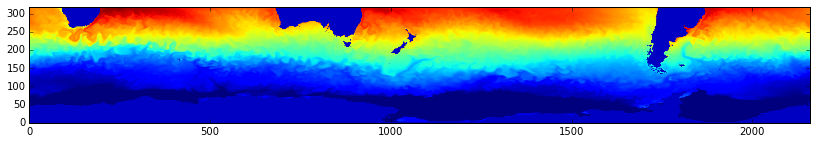

In [29]:
plt.figure(figsize=(14,8))
plt.imshow(theta1)

<matplotlib.colorbar.Colorbar instance at 0x7fe01e6f2ef0>

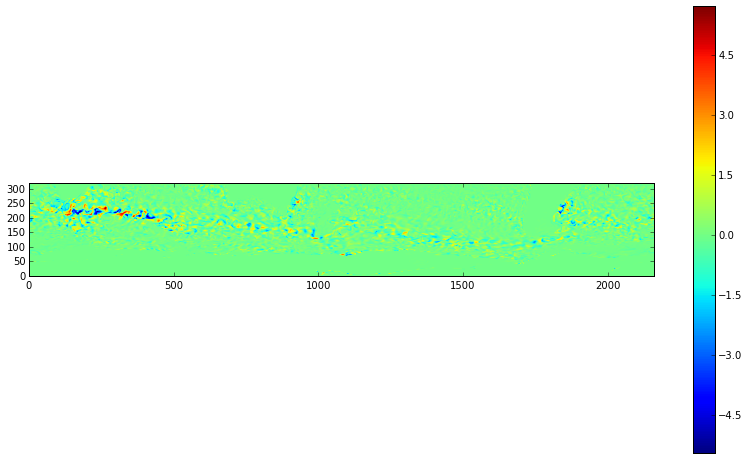

In [31]:
plt.figure(figsize=(14,8))
plt.imshow(theta2-theta1)
plt.colorbar()